Презентация: <https://drive.google.com/file/d/1bKXvDrm_tKnpJb5pnqKUK9g3AIeSfF4A/view?usp=drive_link>

# Проект: "Анализ потребительского поведения для интернет-магазина "Пока все ещё тут""

## Введение

В мире, где конкуренция среди интернет-магазинов стремительно растет, важность понимания потребительского поведения становится неоценимой. Интернет-магазин товаров для дома и быта «Пока все ещё тут» стремится предлагать своим клиентам лучшие товары и услуги, которые помогают создать уют и комфорт в их домах. Однако, чтобы достичь этой цели, необходимо разработать эффективные маркетинговые стратегии, которые будут учитывать индивидуальные предпочтения и потребности клиентов.

## Цель проекта

Сегментировать покупателей по профилю потребления на основе их истории покупок, выявить ключевые характеристики их поведения через исследовательский анализ данных, и разработать рекомендации для улучшения маркетинговых стратегий и повышения удовлетворенности клиентов.

## План проекта

### Подготовка данных

#### Загрузка данных
#### Предварительная очистка данных (удаление дубликатов, обработка пропусков)
#### Преобразование данных (преобразование типов данных)

### Исследовательский анализ данных

#### Изучение основных метрик и показателей (общая выручка, количество уникальных клиентов, средний чек и т.д.)
#### Анализ данных в динамике (по месяцам, сезонам)
#### Анализ данных по клиентам и товарам

### Проведение RFM анализа

#### Расчет метрики Recency (давность последней покупки)
#### Расчет метрики Frequency (частота покупок)
#### Расчет метрики Monetary (суммарные расходы)

### Сегментация покупателей на основе RFM анализа

#### Выявление аномалий и выбросов
#### Присвоение баллов RFM метрикам
#### Определение RFM сегментов (на основе комбинации баллов RFM)
#### Анализ распределения покупателей по RFM сегментам

### Проверка корректности разбиения на сегменты (статистические гипотезы)

#### Проверка гипотезы о различиях в среднем чеке между сегментами
- H0: Нет различий в среднем чеке между сегментами.
- H1: Есть различия в среднем чеке между сегментами.

#### Проверка гипотезы о различиях в частоте покупок между сегментами
- H0: Нет различий в частоте покупок между сегментами.
- H1: Есть различия в частоте покупок между сегментами.

### Создание категорий товаров

#### Анализ товаров и определение категорий
#### Разнесение товаров по категориям
#### Анализ продаж по категориям

### Анализ сезонности покупок

#### Определение сезонных периодов
#### Анализ продаж по сезонам

### Разработка рекомендаций по рекламным рассылкам

#### Определение стратегий маркетинга для каждого сегмента
#### Разработка персонализированных предложений на основе сегментации

### Подготовка презентации

#### Оформление результатов исследования
#### Визуализация данных (графики, диаграммы)
#### Подготовка выводов и рекомендаций
#### Формирование презентации для заказчика

## Подготовка данных

### Загрузка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import math
import re

In [2]:
data = pd.read_csv('/datasets/ecom_dataset_upd.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7474 entries, 0 to 7473
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         7474 non-null   int64  
 1   customer_id  7474 non-null   object 
 2   order_id     7474 non-null   int64  
 3   product      7474 non-null   object 
 4   quantity     7474 non-null   int64  
 5   price        7474 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 350.5+ KB


In [4]:
data.head()

,date,customer_id,order_id,product,quantity,price
0,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0
1,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0
2,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0
3,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0
4,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0


### Предварительная очистка данных (удаление дубликатов, обработка пропусков)

#### Удаление дубликатов

In [5]:
full_duplicates = len(data[data.duplicated()])
print(f"Полных дубликатов транзакций: {full_duplicates}")

Полных дубликатов транзакций: 0


In [6]:
without_dates_duplicates = len(data[data.duplicated(subset=['customer_id', 'order_id', 'product', 'quantity', 'price'])])
print(f"Дубликатов транзакций без учета дат: {without_dates_duplicates}")

Дубликатов транзакций без учета дат: 1864


In [7]:
data = data.drop_duplicates(subset=['customer_id', 'order_id', 'product', 'quantity', 'price'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5610 entries, 0 to 7473
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         5610 non-null   int64  
 1   customer_id  5610 non-null   object 
 2   order_id     5610 non-null   int64  
 3   product      5610 non-null   object 
 4   quantity     5610 non-null   int64  
 5   price        5610 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 306.8+ KB


In [8]:
multi_customer_orders = data.groupby('order_id')['customer_id'].nunique()
multi_customer_orders = multi_customer_orders[multi_customer_orders > 1].index

print(f"Количество заказов, совершенных более чем одним покупателем: {len(multi_customer_orders)}")

Количество заказов, совершенных более чем одним покупателем: 29


In [9]:
data = data[~data['order_id'].isin(multi_customer_orders)]

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5544 entries, 0 to 7473
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         5544 non-null   int64  
 1   customer_id  5544 non-null   object 
 2   order_id     5544 non-null   int64  
 3   product      5544 non-null   object 
 4   quantity     5544 non-null   int64  
 5   price        5544 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 303.2+ KB


#### Обработка пропусков

In [10]:
missing_values = data.isnull().sum()
print("Количество пропусков в датафрейме:")
display(missing_values)

Количество пропусков в датафрейме:


date           0
customer_id    0
order_id       0
product        0
quantity       0
price          0
dtype: int64

### Преобразование данных (преобразование типов данных)

#### Преобразование дат

In [11]:
data['date'] = pd.to_datetime(data['date'], format='%Y%m%d%H')

In [12]:
data.head()

,date,customer_id,order_id,product,quantity,price
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0


Итоги подготовки данных:
1. Всего в первоначальном датафрейме data содержится 7'474 записей.
2. Типы данных включают в себя int64 и float64 (числовые данные) и object (строковые данные).
3. Выявлены и удалены дубликаты транзакций без учета дат.
4. Выявлены и удалены дубликаты заказов, совершенных более чем одним покупателем.
5. Преобразованы данные о дате и времени в датафрейме.
6. Пропусков не обнаружено.
7. В отфильтрованном датафрейме data содержится 5'544 записей.

## Исследовательский анализ данных

### Изучение основных метрик и показателей (общая выручка, количество уникальных клиентов, средний чек и т.д.)

In [13]:
start_date = data['date'].min()
end_date = data['date'].max()

print(f"Период анализируемых данных: {start_date} : {end_date}")

Период анализируемых данных: 2018-10-01 00:00:00 : 2020-01-31 15:00:00


In [14]:
data['total'] = data['quantity'] * data['price']
total_revenue = data['total'].sum()

print(f"Общая выручка за период: {total_revenue:.2f} рублей")

Общая выручка за период: 4601279.42 рублей


In [15]:
unique_customers = data['customer_id'].nunique()

print(f"Количество уникальных клиентов магазина: {unique_customers} человек")

Количество уникальных клиентов магазина: 2413 человек


In [16]:
total_orders = data['order_id'].nunique()

print(f"Количество заказов за анализируемый период: {total_orders}")

Количество заказов за анализируемый период: 3492


In [17]:
average_order_value = total_revenue / total_orders

print(f"Средний чек: {average_order_value:.2f} рублей")

Средний чек: 1317.66 рублей


### Анализ данных в динамике (по месяцам, сезонам)

#### Добавление данных о сезонности

In [18]:
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month

def get_season(date):
    month = date.month
    if month in [12, 1, 2]:
        return 'Зима'
    elif month in [3, 4, 5]:
        return 'Весна'
    elif month in [6, 7, 8]:
        return 'Лето'
    else:
        return 'Осень'
    
data['season'] = data['date'].apply(get_season)

In [19]:
data.head()

,date,customer_id,order_id,product,quantity,price,total,year,month,season
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0,142.0,2018,10,Осень
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0,194.0,2018,10,Осень
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0,112.0,2018,10,Осень
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0,179.0,2018,10,Осень
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0,112.0,2018,10,Осень


#### Анализ данных по месяцам

In [20]:
monthly_data = data.groupby(['year','month']).agg({
    'total': 'sum',
    'order_id': 'nunique',
    'customer_id': 'nunique'
}).reset_index()

monthly_data['total'] = round(monthly_data['total'], 2)
monthly_data['average_order_value'] = round(monthly_data['total'] / monthly_data['order_id'], 2)
monthly_data['year_month'] = monthly_data['year'].astype(str) + '-' + monthly_data['month'].astype(str).str.zfill(2)

print("Анализ по месяцам:")
display(monthly_data)

Анализ по месяцам:


,year,month,total,order_id,customer_id,average_order_value,year_month
0,2018,10,351162.00,238,179,1475.47,2018-10
1,2018,11,359348.00,204,178,1761.51,2018-11
2,2018,12,346449.00,278,228,1246.22,2018-12
3,2019,1,230336.00,165,149,1395.98,2019-01
4,2019,2,305242.00,287,245,1063.56,2019-02
5,2019,3,252188.00,243,228,1037.81,2019-03
6,2019,4,316469.00,264,235,1198.75,2019-04
7,2019,5,238294.00,179,165,1331.25,2019-05
8,2019,6,903176.00,158,149,5716.30,2019-06
9,2019,7,235410.00,198,186,1188.94,2019-07


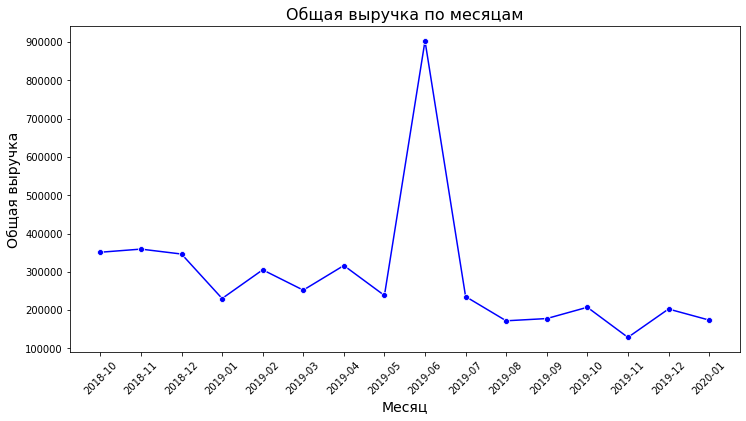

In [21]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_data, x='year_month', y='total', marker='o', color='blue')
plt.title('Общая выручка по месяцам', fontsize=16)
plt.xlabel('Месяц', fontsize=14)
plt.ylabel('Общая выручка', fontsize=14)
plt.xticks(rotation=45)
plt.show()

In [22]:
data.loc[data['total'].idxmax()]

date                                         2019-06-18 15:00:00
customer_id                 312e9a3e-5fca-43ff-a6a1-892d2b2d5ba6
order_id                                                   71743
product        Вантуз с деревянной ручкой d14 см красный, Bur...
quantity                                                    1000
price                                                      675.0
total                                                   675000.0
year                                                        2019
month                                                          6
season                                                      Лето
Name: 5456, dtype: object

Пик на графике в июне 2019 года обусловлен единовременной покупкой 1000 единиц товаров на сумму 675'000 рублей.

#### Выявление аномалий и выбросов

##### Стоимость одной покупки

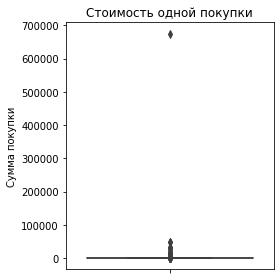

In [23]:
plt.figure(figsize=(4, 4))

sns.boxplot(data=data, y='total')
plt.title('Стоимость одной покупки')
plt.ylabel('Сумма покупки')

plt.tight_layout()
plt.show()

##### Количество покупок на каждого покупателя

In [24]:
purchase_count_per_customer = data.groupby('customer_id')['order_id'].count()

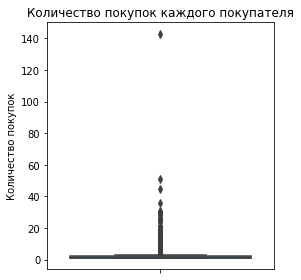

In [25]:
plt.figure(figsize=(4, 4))
sns.boxplot(y=purchase_count_per_customer)
plt.title('Количество покупок каждого покупателя')
plt.ylabel('Количество покупок')

plt.tight_layout()
plt.show()

Находим id покупателя совершившего более 140 покупок.

In [26]:
purchase_count_per_customer.idxmax()

'c971fb21-d54c-4134-938f-16b62ee86d3b'

In [27]:
data = data[(data['total'] <= 100000) & (data['customer_id'] != 'c971fb21-d54c-4134-938f-16b62ee86d3b')]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5400 entries, 0 to 7473
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         5400 non-null   datetime64[ns]
 1   customer_id  5400 non-null   object        
 2   order_id     5400 non-null   int64         
 3   product      5400 non-null   object        
 4   quantity     5400 non-null   int64         
 5   price        5400 non-null   float64       
 6   total        5400 non-null   float64       
 7   year         5400 non-null   int64         
 8   month        5400 non-null   int64         
 9   season       5400 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 464.1+ KB


In [28]:
clean_monthly_data = data.groupby(['year','month']).agg({
    'total': 'sum',
    'order_id': 'nunique',
    'customer_id': 'nunique'
}).reset_index()

clean_monthly_data['total'] = round(clean_monthly_data['total'], 2)
clean_monthly_data['average_order_value'] = round(clean_monthly_data['total'] / clean_monthly_data['order_id'], 2)
clean_monthly_data['year_month'] = clean_monthly_data['year'].astype(str) + '-' + clean_monthly_data['month'].astype(str).str.zfill(2)

print("Анализ по месяцам после удаления вбросов:")
display(clean_monthly_data)

Анализ по месяцам после удаления вбросов:


,year,month,total,order_id,customer_id,average_order_value,year_month
0,2018,10,322923.00,217,178,1488.12,2018-10
1,2018,11,334367.00,184,177,1817.21,2018-11
2,2018,12,302456.00,235,227,1287.05,2018-12
3,2019,1,221528.00,159,148,1393.26,2019-01
4,2019,2,260436.00,259,244,1005.54,2019-02
5,2019,3,243507.00,235,227,1036.20,2019-03
6,2019,4,316469.00,264,235,1198.75,2019-04
7,2019,5,238294.00,179,165,1331.25,2019-05
8,2019,6,228176.00,157,148,1453.35,2019-06
9,2019,7,235410.00,198,186,1188.94,2019-07


#### Анализ данных по сезонам

In [29]:
seasonal_data = data.groupby(['year', 'season']).agg({
    'total': 'sum',
    'order_id': 'nunique',
    'customer_id': 'nunique'
}).reset_index()

seasonal_data['total'] = round(seasonal_data['total'], 2)
seasonal_data['average_order_value'] = round(seasonal_data['total'] / seasonal_data['order_id'], 2)

print("\nАнализ по сезонам:")
print(seasonal_data)


Анализ по сезонам:
   year season      total  order_id  customer_id  average_order_value
0  2018   Зима  302456.00       235          227              1287.05
1  2018  Осень  657290.00       401          355              1639.13
2  2019  Весна  798270.00       677          614              1179.13
3  2019   Зима  684849.33       661          533              1036.08
4  2019   Лето  635686.00       527          493              1206.24
5  2019  Осень  514183.75       597          559               861.28
6  2020   Зима  174036.33       269          269               646.98


Text(0, 0.5, 'Выручка')

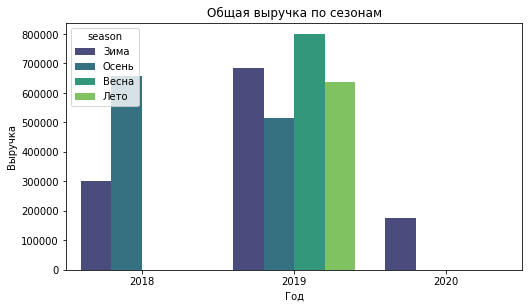

In [30]:
plt.figure(figsize=(18, 10))
plt.subplot(2, 2, 1)
sns.barplot(data=seasonal_data, x='year', y='total', hue='season', palette='viridis')
plt.title('Общая выручка по сезонам')
plt.xlabel('Год')
plt.ylabel('Выручка')

На основе проведенного анализа данных по сезонам можно сделать следующие выводы:

- Выручка по сезонам:

1. Наибольшая общая выручка была зафиксирована весной 2019 года (798'270.00), что может указывать на высокий спрос в этот период.
2. Самая низкая выручка была в зимний период 2020 года (174'036.33), что может свидетельствовать о сезонном снижении покупательской активности или влиянии внешних факторов (например, праздничный сезон).

- Число заказов:

1. Весной 2019 года было зафиксировано наибольшее количество заказов (677), что может свидетельствовать о возросшем интересе покупателей к продукции компании в этот период.

- Число уникальных клиентов:

1. Весной 2019 года наблюдалось наибольшее количество уникальных клиентов (614), что может свидетельствовать о расширении клиентской базы.
2. В зимний период 2020 года число уникальных клиентов значительно сократилось (269), что может указывать на сезонное снижение активности или недостаточную маркетинговую активность.

- Средний чек:

1. Осенью 2018 года был зафиксирован самый высокий средний чек (1'639.13), что может говорить о продаже дорогих товаров или увеличении объемов покупок.
2. Самый низкий средний чек был в зимний период 2020 года (646.98), что может свидетельствовать о покупках более дешевых товаров (распродажах) или снижении объемов покупок.

### Анализ данных по клиентам и товарам

#### Анализ данных по клиентам 

In [31]:
orders_per_customer = data.groupby('customer_id')['order_id'].nunique().mean()
print(f"Среднее количество заказов на одного клиента: {orders_per_customer:.2f}")

Среднее количество заказов на одного клиента: 1.40


In [32]:
spend_per_customer = data.groupby('customer_id')['price'].sum().mean()
print(f"Средние расходы одного клиента: {spend_per_customer:.2f} рублей")

Средние расходы одного клиента: 1163.95 рублей


#### Анализ данных по товарам

In [33]:
top_products = data['product'].value_counts().head(10)
print(f"Самые популярные товары (по количеству заказов): \n\n{top_products}")

Самые популярные товары (по количеству заказов): 

Пеларгония розебудная Red Pandora укорененный черенок                 63
Пеларгония розебудная Prins Nikolai укорененный черенок               54
Пеларгония зональная диам. 12 см сиреневый полумахровый               53
Сумка-тележка 2-х колесная Gimi Argo синяя                            45
Пеларгония розебудная Mary укорененный черенок                        40
Пеларгония розебудная Margaretha укорененный черенок                  31
Пеларгония розебудная Queen Ingrid укорененный черенок                31
Пеларгония зональная Ринго Вайт d-7 см h-10 см укорененный черенок    25
Пеларгония зональная махровая лососевая                               25
Пеларгония зональная диам. 12 см коралловая полумахровая              24
Name: product, dtype: int64


Из этого списка видно, что наиболее популярными товарами являются различные виды пеларгонии, что указывает на высокий интерес к этим растениям среди покупателей.

In [34]:
revenue_per_product = data.groupby('product')['price'].sum().sort_values(ascending=False).head(10)
print(f"Товары с наибольшей выручкой: \n\n{revenue_per_product}")

Товары с наибольшей выручкой: 

product
Сумка-тележка 2-х колесная Gimi Argo синяя                                                48307.0
Сумка-тележка хозяйственная Andersen Scala Shopper Plus, Lini, синяя 133-108-90           22796.0
Сушилка Meliconi Stendy Junior                                                            22376.0
Сумка-тележка хозяйственная Rolser Pack Gloria Logic RG серая, PAC036 marengo LOGIC RG    19674.0
Сумка-тележка 2-х колесная Gimi Galaxy черная                                             19568.0
Сумка-тележка хозяйственная Andersen Scala Shopper, Lini, синяя 112-108-90                18296.0
Гладильная доска Sarayli New Elegant 125x45 см                                            17843.0
Гладильная доска НИКА BLUES 124х46 см 5757                                                17786.0
Мусорный контейнер Hailo BigBin Swing 45 0845-010 45 л хром                               16536.0
Сумка-тележка 2-х колесная складная Gimi Flexi зеленая                        

Эти данные показывают, что наибольшую выручку приносят сумки-тележки различных моделей, что подчеркивает важность данной категории товаров для бизнеса. Это позволяет сделать вывод о том, что фокус на продвижение и расширение ассортимента сумок-тележек может быть стратегически выгодным для увеличения выручки.

## Проведение RFM анализа

### Расчет метрики Recency (давность последней покупки)

In [35]:
current_date = data['date'].max() + pd.DateOffset(days=1)

recency = data.groupby('customer_id')['date'].max().reset_index()
recency.columns = ['customer_id', 'last_purchase_date']
recency['recency'] = (current_date - recency['last_purchase_date']).dt.days
recency = recency.drop(columns='last_purchase_date')

recency.head()

,customer_id,recency
0,000d6849-084e-4d9f-ac03-37174eaf60c4,108
1,001cee7f-0b29-4716-b202-0042213ab038,350
2,00299f34-5385-4d13-9aea-c80b81658e1b,109
3,002d4d3a-4a59-406b-86ec-c3314357e498,369
4,003bbd39-0000-41ff-b7f9-2ddaec152037,124


In [36]:
recency['recency'].describe()

count    2411.000000
mean      216.093322
std       149.390221
min         1.000000
25%        73.000000
50%       208.000000
75%       344.000000
max       488.000000
Name: recency, dtype: float64

### Расчет метрики Frequency (частота покупок)

In [37]:
frequency = data.groupby('customer_id')['order_id'].nunique().reset_index()
frequency.columns = ['customer_id', 'frequency']

frequency.head()

,customer_id,frequency
0,000d6849-084e-4d9f-ac03-37174eaf60c4,1
1,001cee7f-0b29-4716-b202-0042213ab038,1
2,00299f34-5385-4d13-9aea-c80b81658e1b,1
3,002d4d3a-4a59-406b-86ec-c3314357e498,1
4,003bbd39-0000-41ff-b7f9-2ddaec152037,1


In [38]:
frequency['frequency'].describe()

count    2411.000000
mean        1.395686
std         0.919705
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        35.000000
Name: frequency, dtype: float64

### Расчет метрики Monetary (суммарные расходы)

In [39]:
monetary = data.groupby('customer_id')['total'].sum().reset_index()
monetary.columns = ['customer_id', 'monetary']

monetary.head()

,customer_id,monetary
0,000d6849-084e-4d9f-ac03-37174eaf60c4,555.0
1,001cee7f-0b29-4716-b202-0042213ab038,442.0
2,00299f34-5385-4d13-9aea-c80b81658e1b,914.0
3,002d4d3a-4a59-406b-86ec-c3314357e498,1649.0
4,003bbd39-0000-41ff-b7f9-2ddaec152037,2324.0


In [40]:
monetary['monetary'].describe()

count     2411.000000
mean      1562.327423
std       2917.946118
min         15.000000
25%        393.000000
50%        838.000000
75%       1799.000000
max      57278.000000
Name: monetary, dtype: float64

In [41]:
rfm = recency.merge(frequency, on='customer_id').merge(monetary, on='customer_id')

In [42]:
data = data.merge(rfm, on='customer_id')
data.head()

,date,customer_id,order_id,product,quantity,price,total,year,month,season,recency,frequency,monetary
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0,142.0,2018,10,Осень,488,1,1037.0
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0,194.0,2018,10,Осень,488,1,1037.0
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0,112.0,2018,10,Осень,488,1,1037.0
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0,179.0,2018,10,Осень,488,1,1037.0
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0,112.0,2018,10,Осень,488,1,1037.0


На основе полученных данных можно сделать следующие выводы:

- Recency: Большинство клиентов совершили последнюю покупку относительно недавно, с медианой в 208 дней. Значительное число клиентов совершило покупки за последние 73 дня (25-й процентиль), что свидетельствует об активной клиентской базе.

- Frequency: Среднее количество покупок составляет около 1.39, что указывает на то, что большинство клиентов совершают покупки нечасто. Медиана в 1 покупку подтверждает это, при этом лишь немногие клиенты делают частые покупки (максимум 35 покупок).

- Monetary: Средний суммарный расход составляет около 1434.26, что демонстрирует широкий разброс расходов среди клиентов. Большинство клиентов тратят до 831 (медиана), с заметным числом клиентов, тратящих до 1789.67 (75-й процентиль).

В связи с этим оптимально сегментировать покупателей только по 2 критериям: Frequency и Monetary.

## Сегментация покупателей на основе RFM анализа

### Выявление аномалий и выбросов

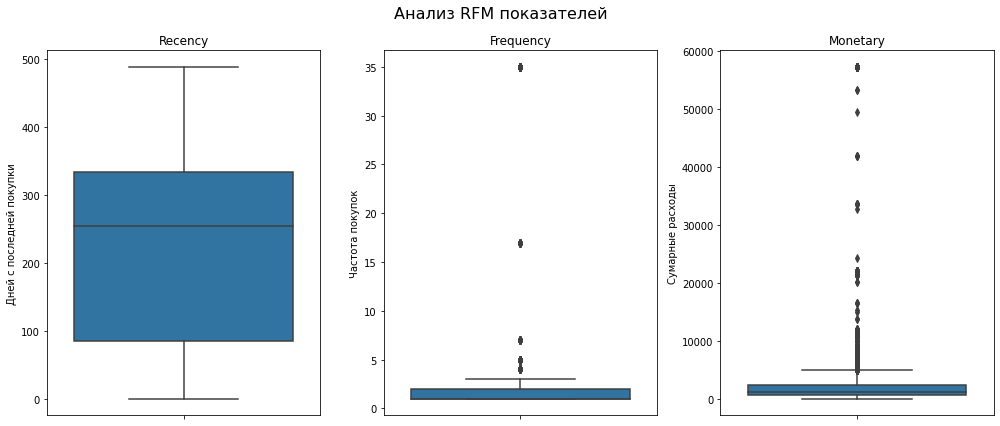

In [43]:
fig, axes = plt.subplots(1, 3, figsize=(14, 6))

sns.boxplot(data=data, y='recency', ax=axes[0])
axes[0].set_title('Recency')
#axes[0].set_ylim(0, 500)
axes[0].set_ylabel('Дней с последней покупки')

sns.boxplot(data=data, y='frequency', ax=axes[1])
axes[1].set_title('Frequency')
#axes[1].set_ylim(0, 60)
axes[1].set_ylabel('Частота покупок')

sns.boxplot(data=data, y='monetary', ax=axes[2])
axes[2].set_title('Monetary')
#axes[2].set_ylim(0, 12000)
axes[2].set_ylabel('Сумарные расходы')

fig.suptitle('Анализ RFM показателей', fontsize=16)
plt.tight_layout()
plt.show()

In [44]:
data['recency'].describe()

count    5400.000000
mean      231.203519
std       144.747478
min         1.000000
25%        86.000000
50%       254.000000
75%       334.000000
max       488.000000
Name: recency, dtype: float64

In [45]:
data['frequency'].describe()

count    5400.000000
mean        1.795741
std         3.243119
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        35.000000
Name: frequency, dtype: float64

In [46]:
data['monetary'].describe()

count     5400.000000
mean      2422.653580
std       5915.324385
min         15.000000
25%        600.000000
50%       1210.000000
75%       2336.000000
max      57278.000000
Name: monetary, dtype: float64

### Присвоение баллов RFM метрикам

In [47]:
data['recency_group'] = pd.qcut(data['recency'], 3, labels=False).astype(int)
data['monetary_group'] = pd.qcut(data['monetary'], 3, labels=False).astype(int)

data['RFM_sum'] = data['recency_group'] * 10 + data['monetary_group']

### Определение RFM сегментов (на основе комбинации баллов RFM)

In [48]:
data['RFM_segment'] = pd.qcut(data['RFM_sum'], 4, labels=['Новички', 'Перспективные', 'Лояльные', 'Бывшие лояльные'])

data.head()

,date,customer_id,order_id,product,quantity,price,total,year,month,season,recency,frequency,monetary,recency_group,monetary_group,RFM_sum,RFM_segment
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0,142.0,2018,10,Осень,488,1,1037.0,2,1,21,Бывшие лояльные
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0,194.0,2018,10,Осень,488,1,1037.0,2,1,21,Бывшие лояльные
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0,112.0,2018,10,Осень,488,1,1037.0,2,1,21,Бывшие лояльные
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0,179.0,2018,10,Осень,488,1,1037.0,2,1,21,Бывшие лояльные
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0,112.0,2018,10,Осень,488,1,1037.0,2,1,21,Бывшие лояльные


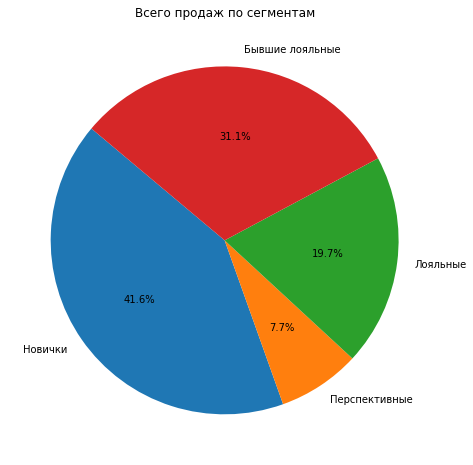

In [49]:
segment_sums = data.groupby('RFM_segment')['total'].sum()

plt.figure(figsize=(8, 8))
segment_sums.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Всего продаж по сегментам')
plt.ylabel('')
plt.show()

### Анализ распределения покупателей по RFM сегментам

In [50]:
segment_counts = data['RFM_segment'].value_counts()

print(f"Распределение покупателей по RFM сегментам: \n{segment_counts}")

Распределение покупателей по RFM сегментам: 
Новички            1800
Лояльные           1385
Бывшие лояльные    1135
Перспективные      1080
Name: RFM_segment, dtype: int64


In [51]:
segment_summary = data.groupby('RFM_segment').agg({
    'customer_id': 'nunique',
    'recency': ['mean', 'median', 'min', 'max'],
    'frequency': ['mean', 'median', 'min', 'max'],
    'monetary': ['mean', 'median', 'min', 'max']
}).reset_index()

segment_summary.columns = ['Segment', 'Unique Customers', 'Recency Mean', 'Recency Median', 'Recency Min', 'Recency Max', 
                           'Frequency Mean', 'Frequency Median', 'Frequency Min', 'Frequency Max', 
                           'Monetary Mean', 'Monetary Median', 'Monetary Min', 'Monetary Max']

print("Статистика по сегментам:")
segment_summary

Статистика по сегментам:


,Segment,Unique Customers,Recency Mean,Recency Median,Recency Min,Recency Max,Frequency Mean,Frequency Median,Frequency Min,Frequency Max,Monetary Mean,Monetary Median,Monetary Min,Monetary Max
0,Новички,984,58.452778,53.5,1,145,1.986111,2,1,17,1806.627407,1050.0,15.0,21361.0
1,Перспективные,445,238.524074,250.0,146,290,1.200000,1,1,4,930.964815,915.0,22.0,1856.0
2,Лояльные,555,314.934296,283.0,148,487,1.408664,1,1,7,2275.714079,2090.0,15.0,49432.0
3,Бывшие лояльные,427,396.029956,411.0,291,488,2.533040,1,1,35,4998.320705,1800.0,780.0,57278.0


- Сегмент "Новички" характеризуется относительно низкой давностью последней покупки, что указывает на то, что клиенты недавно сделали покупку. Несмотря на это, их частота покупок и суммарные расходы показывают значительное разнообразие.

- Сегмент "Перспективные" включает клиентов, которые давно не покупали, но все еще делают покупки. Эти клиенты имеют относительно низкую частоту покупок и суммарные расходы.

- Сегмент "Лояльные" состоит из клиентов, которые, несмотря на большую давность последней покупки, имеют умеренные расходы и частоту покупок. Они показывают потенциал для дальнейшего увеличения лояльности.

- Сегмент "Бывшие лояльные" включает клиентов с длительным периодом без покупок, но с высокой частотой покупок и значительными суммарными расходами до момента потери. Эти клиенты могли бы представлять значительный потенциал для восстановления отношений.

## Проверка корректности разбиения на сегменты (статистические гипотезы)

### Проверка гипотезы о различиях в среднем чеке между сегментами
- H0: Нет различий в среднем чеке между сегментами.
- H1: Есть различия в среднем чеке между сегментами.

In [52]:
segments = data['RFM_segment'].unique()

for segment in segments:
    segment_data = data[data['RFM_segment'] == segment]['monetary']
    
    shapiro_test = stats.shapiro(segment_data)
    
    print(f"Сегмент {segment}:")
    print(f"Shapiro-Wilk p-value = {shapiro_test.pvalue:.5f}")
    
    if shapiro_test.pvalue < 0.05:
        print("Распределение не нормально распределено.\n")
    else:
        print("Распределение нормально распределено.\n")


Сегмент Бывшие лояльные:
Shapiro-Wilk p-value = 0.00000
Распределение не нормально распределено.

Сегмент Новички:
Shapiro-Wilk p-value = 0.00000
Распределение не нормально распределено.

Сегмент Лояльные:
Shapiro-Wilk p-value = 0.00000
Распределение не нормально распределено.

Сегмент Перспективные:
Shapiro-Wilk p-value = 0.00000
Распределение не нормально распределено.



Поскольку распределения не являются нормальными, для статистического анализа различий между сегментами будет использован непараметрический тест Манна-Уитни

Для проведения множественных тестов применим один из методов коррекции уровня значимости Шидака. 

In [53]:
num_comparisons = len(segments) * (len(segments) - 1) // 2

alpha = 0.05

alpha_corrected = 1 - math.pow((1 - alpha), 1 / num_comparisons)

print(f"Скорректированный уровень значимости (Шидака): {alpha_corrected:.5f}")

Скорректированный уровень значимости (Шидака): 0.00851


In [54]:
for i in range(len(segments)):
    for j in range(i + 1, len(segments)):
        segment_1 = data[data['RFM_segment'] == segments[i]]['monetary']
        segment_2 = data[data['RFM_segment'] == segments[j]]['monetary']
        
        u_stat, p_value = stats.mannwhitneyu(segment_1, segment_2)
        
        print(f"Сравнение сегментов {segments[i]} и {segments[j]}:")
        print(f"Mann-Whitney U-статистика = {u_stat:.5f}, p-value = {p_value:.5f}")
        
        if p_value < alpha_corrected:
            print(f"Есть статистически значимые различия в среднем чеке между сегментами {segments[i]} и {segments[j]}.\n")
        else:
            print(f"Нет статистически значимых различий в среднем чеке между сегментами {segments[i]} и {segments[j]}.\n")

Сравнение сегментов Бывшие лояльные и Новички:
Mann-Whitney U-статистика = 1413772.00000, p-value = 0.00000
Есть статистически значимые различия в среднем чеке между сегментами Бывшие лояльные и Новички.

Сравнение сегментов Бывшие лояльные и Лояльные:
Mann-Whitney U-статистика = 918271.50000, p-value = 0.00000
Есть статистически значимые различия в среднем чеке между сегментами Бывшие лояльные и Лояльные.

Сравнение сегментов Бывшие лояльные и Перспективные:
Mann-Whitney U-статистика = 1018994.00000, p-value = 0.00000
Есть статистически значимые различия в среднем чеке между сегментами Бывшие лояльные и Перспективные.

Сравнение сегментов Новички и Лояльные:
Mann-Whitney U-статистика = 1121746.00000, p-value = 0.00000
Есть статистически значимые различия в среднем чеке между сегментами Новички и Лояльные.

Сравнение сегментов Новички и Перспективные:
Mann-Whitney U-статистика = 1138158.00000, p-value = 0.00000
Есть статистически значимые различия в среднем чеке между сегментами Новичк

### Проверка гипотезы о различиях в частоте покупок между сегментами
- H0: Нет различий в частоте покупок между сегментами.
- H1: Есть различия в частоте покупок между сегментами.

In [55]:
for segment in segments:
    segment_data = data[data['RFM_segment'] == segment]['frequency']
    
    shapiro_test = stats.shapiro(segment_data)
    
    print(f"Сегмент {segment}:")
    print(f"Shapiro-Wilk p-value = {shapiro_test.pvalue:.5f}")
    
    if shapiro_test.pvalue < 0.05:
        print("Распределение не нормально распределено.\n")
    else:
        print("Распределение нормально распределено.\n")

Сегмент Бывшие лояльные:
Shapiro-Wilk p-value = 0.00000
Распределение не нормально распределено.

Сегмент Новички:
Shapiro-Wilk p-value = 0.00000
Распределение не нормально распределено.

Сегмент Лояльные:
Shapiro-Wilk p-value = 0.00000
Распределение не нормально распределено.

Сегмент Перспективные:
Shapiro-Wilk p-value = 0.00000
Распределение не нормально распределено.



Поскольку распределения не являются нормальными, для статистического анализа различий между сегментами будет использован непараметрический тест Манна-Уитни

In [56]:
for i in range(len(segments)):
    for j in range(i + 1, len(segments)):
        segment_1 = data[data['RFM_segment'] == segments[i]]['frequency']
        segment_2 = data[data['RFM_segment'] == segments[j]]['frequency']
        
        u_stat, p_value = stats.mannwhitneyu(segment_1, segment_2)
        
        print(f"Сравнение сегментов {segments[i]} и {segments[j]}:")
        print(f"Mann-Whitney U-статистика = {u_stat:.5f}, p-value = {p_value:.5f}")
        
        if p_value < alpha_corrected:
            print(f"Есть статистически значимые различия в среднем чеке между сегментами {segments[i]} и {segments[j]}.\n")
        else:
            print(f"Нет статистически значимых различий в среднем чеке между сегментами {segments[i]} и {segments[j]}.\n")

Сравнение сегментов Бывшие лояльные и Новички:
Mann-Whitney U-статистика = 418975.00000, p-value = 0.00000
Есть статистически значимые различия в среднем чеке между сегментами Бывшие лояльные и Новички.

Сравнение сегментов Бывшие лояльные и Лояльные:
Mann-Whitney U-статистика = 759390.00000, p-value = 0.03529
Нет статистически значимых различий в среднем чеке между сегментами Бывшие лояльные и Лояльные.

Сравнение сегментов Бывшие лояльные и Перспективные:
Mann-Whitney U-статистика = 628676.00000, p-value = 0.10757
Нет статистически значимых различий в среднем чеке между сегментами Бывшие лояльные и Перспективные.

Сравнение сегментов Новички и Лояльные:
Mann-Whitney U-статистика = 1937888.50000, p-value = 0.00000
Есть статистически значимые различия в среднем чеке между сегментами Новички и Лояльные.

Сравнение сегментов Новички и Перспективные:
Mann-Whitney U-статистика = 1603594.00000, p-value = 0.00000
Есть статистически значимые различия в среднем чеке между сегментами Новички и 

- Средний чек:

Есть статистически значимые различия в среднем чеке между всеми сегментами.

- Частота покупок:

Есть статистически значимые различия в частоте покупок между всеми сегментами, кроме пар "Бывшие лояльные", и "Перспективные" и "Бывшие лояльные" и "Перспективные".

## Создание категорий товаров

### Анализ товаров и определение категорий

In [57]:
unique_products = data['product'].unique()
unique_products[:50]

array(['Комнатное растение в горшке Алое Вера, d12, h30',
       'Комнатное растение в горшке Кофе Арабика, d12, h25',
       'Радермахера d-12 см h-20 см', 'Хризолидокарпус Лутесценс d-9 см',
       'Циперус Зумула d-12 см h-25 см', 'Шеффлера Лузеана d-9 см',
       'Юкка нитчатая d-12 см h-25-35 см',
       'Настенная сушилка для белья Gimi Brio Super 100',
       'Таз пластмассовый 21,0 л круглый "Водолей" С614, 1404056',
       'Рассада Дыни сорт Казачка, горшок 9*9см',
       'Вешалка для брюк металлическая с резиновым покрытием 26 см цвет: синяя, Attribute, AHS331',
       'Сушилка для белья потолочная Zalger Lift Basic 1520 200 см, 10 м',
       'Линейка, длина 30 см, Truper, RGL-30/14387',
       'Чехол Eurogold Clean Basic хлопок для досок 120х38-120х42 см C42',
       'Сумка-тележка 2-х колесная Gimi Argo синяя',
       'Щетка-сметка 3-х рядная деревянная 450 мм (плоская ручка), Поиск Риф 1801095',
       'Щетка-сметка 4-х рядная деревянная 300 мм (фигурная ручка) ворс 5,5 см

### Разнесение товаров по категориям

In [58]:
category_keywords = {
    'сад и огород': ['растение', 'горшке', 'радермахера', 'циперус', 'хризолидокарпус', 'юкка', 'герань', 'мимоза',\
            'литопс', 'рассада', 'эвкалипт', 'душица', 'тимьян', 'лорофитум', 'мирт', 'фиалка', 'пеларгония', \
            'мединилла', 'лавр', 'шеффлера', 'суккулент', 'эхеверия', 'каланхое', 'мята', 'пахира', \
            'эхинокактус', 'фуксия', 'пуансеттия', 'адиантум', 'кампанула', 'флокс', 'зверобой', 'цикламен',\
            'настурция', 'калатея', 'дендробиум', 'нолина', 'томата', r'd-\d+ см', 'салат', 'петрушка', 'укроп', \
            'томат', 'базилик', 'вербена', 'гортензия', 'петуния', 'кориандр', 'кашпо', 'колокольчик',\
            'гвоздика', 'котовник', 'бегония', 'бакопа', 'цинния', 'космея', 'хризантема', 'кипарисовик',\
            'клубника', 'незабудка', 'пиретрум', 'в кассете', 'бархатцы', 'ранункулус', 'физостегия', 'морковь',\
            'ромашка', 'лен', 'анемона', 'огурец', 'камнеломка', 'алиссум', 'годеция', 'лаватера', 'аквилегия',\
            'капуста', 'кореопсис', 'лапчатка', 'калибрахоа', 'лобелия', 'львиный зев', 'цинерария', 'эшшольция',\
            'вероника', 'овсянница', 'виноград', 'вербейник', 'седум', 'ясколка', 'солидаго', 'энотера', 'осина',\
            'астра', 'арбуз', 'барвинок', 'хоста', 'роза', 'гайлардия', 'монарда', 'рудбекия', 'дыня', 'бадан',\
            'примула', 'гиностемма', 'калла', 'гипсофила', 'земляника', 'эхинацея', 'тюльпан', 'виола', \
            'ель канадская', 'горох', 'георгина', 'смолевка', 'лилейник', 'платикодон', 'кодонанта'],
    'посуда и кухонная техника': ['чайник', 'сковорода', 'крышка', 'банка', 'тарелка', 'термос', 'стакан', 'кружек', 'салатник', \
               'для чистки овощей', 'фужеров', 'кастрюля', 'просеиватель', 'термокружка', 'кувшин', \
               'вилка столовая', 'ложка','нож', 'сахарница', 'толкушка', \
               'подставка для яйца', 'половник', 'кружка', 'блюдо', 'для выпечки', 'терка', 'пьезозажигалка',\
               'миксер', 'противень', 'соковыжималка', 'соковарка', 'сотейник', 'масленка', 'миска', 'овощеварка',\
               'чайный набор', 'отделитель косточек', 'хлебница', 'лопатка', 'шприц кондитерский', 'салфетница',\
               'овощечистка', 'лоток для холодца', 'мантоварка', 'бокалов', 'картофелемялка', 'форм для кексов',\
               'пресс', 'набор посуды', 'кухонные', 'венчик', 'сито', 'рыбочистка', 'столовых приборов',\
               'электроштопор', 'блюдце', 'для соуса', 'бульонница', 'скалка', 'тортница', 'коробка прямоугольная',\
               'емкость для свч', 'весы настольные', 'орехоколка', 'кипятильник'],
    'ремонт и мебель': ['шпингалет', 'котел','пробки', 'оконная', 'лестница-стремянка', 'лестница стремянка',\
                        'сварка', 'крепеж для пружины','стремянки', 'ящик почтовый', 'пружина дверная',\
                        'уголок', 'решетка', 'набор сверел', 'завертка', 'ручка мебельная', 'сверло-фреза',\
                        'набор инструментов', 'петля', 'шило', 'ручка-скоба', 'по металлу', 'фиксатор-шар',\
                        'напильников', 'обувница','этажерка', 'стеллаж для обуви','детский пуф', 'ванна 70 л',\
                        'полка','сиденье в ванну',  'подголовник', 'полки', 'стремянка ', 'стремянка-табурет',\
                        'для хранения'],
    'текстиль и декор': ['полотенце', 'хлопок', 'подушка', 'одеяло', 'скатерть', 'плед', 'коврик', 'салфетка', \
                         'муляж', 'искусственный', 'декоративная коробка', 'новогоднее дерево', 'покрывало',\
                         'искусственная композиция из цветов', 'штора текстильная', 'искуственных цветов',\
                         'ваза', 'искусственная лиана', 'антуриум', 'фоторамка', 'ключница', 'постельного белья',\
                         'коробка infinity', 'дозатор', 'ковер придверный', 'мыло ручной работы',\
                         'стеллажный с крышкой'],
    'средства для стирки и уборки': ['биопорошок', 'чистящий крем', 'отбеливатель',\
                         'средство', 'антижир', 'бальзам', 'ополаскиватель', 'кондиционер','совок', 'тряпка',\
                         'мыло', 'урна', 'ведро', 'ёрш', 'туалета', 'швабра', 'насадка для ерша','для полировки'\
                         'для влажной и сухой чистки', 'перчатки', 'щетка', 'сметка', 'к швабре', 'губка',\
                         'насадка-моп', 'для гигиенических поверхностей', 'вантуз', 'нетканые салфетки',\
                         'скребок', 'веник', 'из микрофибры', 'соль для посудомоечных машин', 'для стирки',\
                         'окномойка', 'для влажной и сухой чистки'],
    'красота и здоровье': ['зубная', 'пена для ванн', 'фен', 'весы напольные', 'увлажняющая маска', 'халат',],
    'хозтовары': ['таз', 'тележка', 'сушилка', 'доска', 'крючок', 'вешалка', 'сумка', 'гладильной',\
                  'стяжки для чехла', 'коврик придверный', 'чехол', 'штора для ванной', 'вешалки',\
                  'набор вешалок', 'вакуумный пакет', 'карниз',  'набор ковров','плечики', 'штанга для ванной',\
                  'подставка','подрукавник', 'штора со встроенными кольцами','ковёр придверный', 'контейнер',\
                  'прищепки', 'мешок', 'бидон', 'веревка', 'утюг', 'корыто', 'фал капроновый', 'для зажигалок',\
                  'шнур', 'шпагат', 'пробка для ванны', 'для туалетной бумаги', 'термометр', 'кофр', 'лоток',\
                  'ковш', 'ролик', 'корзинка', 'сменный блок', 'насадка','рассекатель пламени',\
                  'сетка для глажения', 'отжим', 'прищепок','для штор', 'мыльница', 'сушилка', 'бак для белья',\
                  'гладильная доска-стремянка', 'сумка для тележки', 'корзина', 'паста для полировки'],
    'школа': ['линейка', 'комод эльфпласт', 'штангенциркуль', 'угольник']
}

def type_items(product):
    product = product.lower() 
    for category, keywords in category_keywords.items():
        for keyword in keywords:
            if re.search(keyword, product):     
                return category
    return 'другие'

data['category'] = data['product'].apply(type_items)

In [59]:
data.loc[data['category'] == 'сад и огород'].head()

,date,customer_id,order_id,product,quantity,price,total,year,month,season,recency,frequency,monetary,recency_group,monetary_group,RFM_sum,RFM_segment,category
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0,142.0,2018,10,Осень,488,1,1037.0,2,1,21,Бывшие лояльные,сад и огород
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0,194.0,2018,10,Осень,488,1,1037.0,2,1,21,Бывшие лояльные,сад и огород
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0,112.0,2018,10,Осень,488,1,1037.0,2,1,21,Бывшие лояльные,сад и огород
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0,179.0,2018,10,Осень,488,1,1037.0,2,1,21,Бывшие лояльные,сад и огород
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0,112.0,2018,10,Осень,488,1,1037.0,2,1,21,Бывшие лояльные,сад и огород


In [60]:
data.loc[data['category'] == 'посуда и кухонная техника'].head()

,date,customer_id,order_id,product,quantity,price,total,year,month,season,recency,frequency,monetary,recency_group,monetary_group,RFM_sum,RFM_segment,category
17,2018-10-02 14:00:00,4d93d3f6-8b24-403b-a74b-f5173e40d7db,68503,"Вилка столовая RIPPLE сталь 3 мм, 3 шт, Attrib...",1,187.0,187.0,2018,10,Осень,465,35,57278.0,2,2,22,Бывшие лояльные,посуда и кухонная техника
18,2018-10-02 14:00:00,4d93d3f6-8b24-403b-a74b-f5173e40d7db,68503,"Ложка столовая RIPPLE сталь 3 мм, 3 шт, Attrib...",1,202.0,202.0,2018,10,Осень,465,35,57278.0,2,2,22,Бывшие лояльные,посуда и кухонная техника
19,2018-10-02 14:00:00,4d93d3f6-8b24-403b-a74b-f5173e40d7db,68503,"Ложка чайная RIPPLE сталь 2,5 мм, 3 шт, Attrib...",1,142.0,142.0,2018,10,Осень,465,35,57278.0,2,2,22,Бывшие лояльные,посуда и кухонная техника
20,2018-10-02 14:00:00,4d93d3f6-8b24-403b-a74b-f5173e40d7db,68503,"Нож столовый RIPPLE 80 г 2 шт, Attribute, ACR042",1,172.0,172.0,2018,10,Осень,465,35,57278.0,2,2,22,Бывшие лояльные,посуда и кухонная техника
29,2018-10-08 12:00:00,4d93d3f6-8b24-403b-a74b-f5173e40d7db,68567,"Чайник эмалированный ""Алые маки"" со свистком 2...",1,937.0,937.0,2018,10,Осень,465,35,57278.0,2,2,22,Бывшие лояльные,посуда и кухонная техника


In [61]:
data.loc[data['category'] == 'ремонт и мебель'].head()

,date,customer_id,order_id,product,quantity,price,total,year,month,season,recency,frequency,monetary,recency_group,monetary_group,RFM_sum,RFM_segment,category
36,2018-10-12 15:00:00,4d93d3f6-8b24-403b-a74b-f5173e40d7db,68623,"Петля приварная гаражная d 14х90 мм с шаром, 1...",50,38.0,1900.0,2018,10,Осень,465,35,57278.0,2,2,22,Бывшие лояльные,ремонт и мебель
41,2018-10-16 11:00:00,4d93d3f6-8b24-403b-a74b-f5173e40d7db,68662,Стремянки Colombo Leonardo 3 ступени G300A03W ...,1,3974.0,3974.0,2018,10,Осень,465,35,57278.0,2,2,22,Бывшие лояльные,ремонт и мебель
99,2018-10-02 18:00:00,649c4398-a4c4-4d01-b29b-f14704ce6e17,68508,"Котел алюминиевый 70,0 л без крышки Балезино, ...",1,2924.0,2924.0,2018,10,Осень,486,1,2924.0,2,2,22,Бывшие лояльные,ремонт и мебель
145,2019-11-01 12:00:00,ec7d88d5-2a52-4843-80d7-1f193f1c44e1,103309,Лестница-стремянка Dogrular Ufuk Al алюминевая...,1,1012.0,1012.0,2019,11,Осень,92,2,1161.0,0,1,1,Новички,ремонт и мебель
163,2018-10-07 07:00:00,f37fa8c2-24a0-451a-8306-39d397e7c4b2,68554,Стремянка алюминиевая Hailo 4302-301 LivingSte...,1,4949.0,4949.0,2018,10,Осень,92,2,5159.0,0,2,2,Новички,ремонт и мебель


In [62]:
data.loc[data['category'] == 'текстиль и декор'].head()

,date,customer_id,order_id,product,quantity,price,total,year,month,season,recency,frequency,monetary,recency_group,monetary_group,RFM_sum,RFM_segment,category
13,2018-10-01 13:00:00,4d93d3f6-8b24-403b-a74b-f5173e40d7db,68485,Чехол Eurogold Clean Basic хлопок для досок 12...,1,187.0,187.0,2018,10,Осень,465,35,57278.0,2,2,22,Бывшие лояльные,текстиль и декор
27,2018-10-08 12:00:00,4d93d3f6-8b24-403b-a74b-f5173e40d7db,68567,Простыня на резинке односпальная Wellness RM90...,2,899.0,1798.0,2018,10,Осень,465,35,57278.0,2,2,22,Бывшие лояльные,текстиль и декор
30,2018-10-08 16:00:00,4d93d3f6-8b24-403b-a74b-f5173e40d7db,68575,"Штора текстильная для ванны и душа полиэстер, ...",1,749.0,749.0,2018,10,Осень,465,35,57278.0,2,2,22,Бывшие лояльные,текстиль и декор
44,2018-10-17 15:00:00,4d93d3f6-8b24-403b-a74b-f5173e40d7db,68672,Муляж Лимон желтый 9 см полиуретан,10,56.0,560.0,2018,10,Осень,465,35,57278.0,2,2,22,Бывшие лояльные,текстиль и декор
46,2018-10-19 12:00:00,4d93d3f6-8b24-403b-a74b-f5173e40d7db,68690,Чехол для гладильной доски Zalger 520125 140х5...,3,299.0,897.0,2018,10,Осень,465,35,57278.0,2,2,22,Бывшие лояльные,текстиль и декор


In [63]:
data.loc[data['category'] == 'средства для стирки и уборки'].head()

,date,customer_id,order_id,product,quantity,price,total,year,month,season,recency,frequency,monetary,recency_group,monetary_group,RFM_sum,RFM_segment,category
15,2018-10-02 11:00:00,4d93d3f6-8b24-403b-a74b-f5173e40d7db,68493,Щетка-сметка 3-х рядная деревянная 450 мм (пло...,15,49.0,735.0,2018,10,Осень,465,35,57278.0,2,2,22,Бывшие лояльные,средства для стирки и уборки
16,2018-10-02 11:00:00,4d93d3f6-8b24-403b-a74b-f5173e40d7db,68493,Щетка-сметка 4-х рядная деревянная 300 мм (фиг...,15,70.0,1050.0,2018,10,Осень,465,35,57278.0,2,2,22,Бывшие лояльные,средства для стирки и уборки
23,2018-10-04 13:00:00,4d93d3f6-8b24-403b-a74b-f5173e40d7db,68525,"Ёрш унитазный с деревянной ручкой , Ваир 1712012",15,56.0,840.0,2018,10,Осень,465,35,57278.0,2,2,22,Бывшие лояльные,средства для стирки и уборки
42,2018-10-17 11:00:00,4d93d3f6-8b24-403b-a74b-f5173e40d7db,68668,Щетка для посуды *Мила* SV3182 1807009,50,27.0,1350.0,2018,10,Осень,465,35,57278.0,2,2,22,Бывшие лояльные,средства для стирки и уборки
43,2018-10-17 11:00:00,4d93d3f6-8b24-403b-a74b-f5173e40d7db,68668,"Щетка-утюжок с ручкой Миди, Standart, York, G1126",50,44.0,2200.0,2018,10,Осень,465,35,57278.0,2,2,22,Бывшие лояльные,средства для стирки и уборки


In [64]:
data.loc[data['category'] == 'красота и здоровье'].head()

,date,customer_id,order_id,product,quantity,price,total,year,month,season,recency,frequency,monetary,recency_group,monetary_group,RFM_sum,RFM_segment,category
311,2018-10-18 14:00:00,b371ce80-259a-4bb8-a550-0ebff690e3e1,68682,Пена для ванн Vestar хвойная Пихта 900 мл Росс...,1,82.0,82.0,2018,10,Осень,471,1,1615.0,2,1,21,Бывшие лояльные,красота и здоровье
346,2018-10-21 22:00:00,73622418-6eda-4c65-9334-afe0c2a92d1b,68712,Зубная паста Zact с эффектом отбеливания кофей...,1,194.0,194.0,2018,10,Осень,467,1,1547.0,2,1,21,Бывшие лояльные,красота и здоровье
347,2018-10-21 22:00:00,73622418-6eda-4c65-9334-afe0c2a92d1b,68712,Зубная паста Zact Lion Smokers Toothpaste 100 ...,1,134.0,134.0,2018,10,Осень,467,1,1547.0,2,1,21,Бывшие лояльные,красота и здоровье
348,2018-10-21 22:00:00,73622418-6eda-4c65-9334-afe0c2a92d1b,68712,Зубная паста Zact Lion Whitening Toothpaste 10...,1,134.0,134.0,2018,10,Осень,467,1,1547.0,2,1,21,Бывшие лояльные,красота и здоровье
634,2019-11-08 00:00:00,c728c3b3-0da6-44f3-aa26-15a65efd0df1,101909,Увлажняющая маска Brown Rice Moisture 330 мл К...,1,442.0,442.0,2019,11,Осень,85,2,891.0,0,1,1,Новички,красота и здоровье


In [65]:
data.loc[data['category'] == 'хозтовары'].head()

,date,customer_id,order_id,product,quantity,price,total,year,month,season,recency,frequency,monetary,recency_group,monetary_group,RFM_sum,RFM_segment,category
7,2018-10-01 08:00:00,375e0724-f033-4c76-b579-84969cf38ee2,68479,Настенная сушилка для белья Gimi Brio Super 100,1,824.0,824.0,2018,10,Осень,488,1,824.0,2,1,21,Бывшие лояльные,хозтовары
8,2018-10-01 08:00:00,6644e5b4-9934-4863-9778-aaa125207701,68478,"Таз пластмассовый 21,0 л круглый ""Водолей"" С61...",1,269.0,269.0,2018,10,Осень,92,2,307.0,0,0,0,Новички,хозтовары
10,2018-10-01 11:00:00,161e1b98-45ba-4b4e-8236-e6e3e70f6f7c,68483,Вешалка для брюк металлическая с резиновым пок...,10,82.0,820.0,2018,10,Осень,488,1,820.0,2,1,21,Бывшие лояльные,хозтовары
11,2018-10-01 12:00:00,86432d8d-b706-463b-bd5d-6a9e170daee3,68484,Сушилка для белья потолочная Zalger Lift Basic...,1,614.0,614.0,2018,10,Осень,92,2,861.0,0,1,1,Новички,хозтовары
14,2018-10-02 10:00:00,4d93d3f6-8b24-403b-a74b-f5173e40d7db,68491,Сумка-тележка 2-х колесная Gimi Argo синяя,1,1049.0,1049.0,2018,10,Осень,465,35,57278.0,2,2,22,Бывшие лояльные,хозтовары


In [66]:
data.loc[data['category'] == 'школа'].head()

,date,customer_id,order_id,product,quantity,price,total,year,month,season,recency,frequency,monetary,recency_group,monetary_group,RFM_sum,RFM_segment,category
12,2019-10-31 19:00:00,86432d8d-b706-463b-bd5d-6a9e170daee3,107076,"Линейка, длина 30 см, Truper, RGL-30/14387",1,247.0,247.0,2019,10,Осень,92,2,861.0,0,1,1,Новички,школа
281,2019-11-03 16:00:00,9f69c05a-d4e0-4439-a182-b4322e77ab99,112209,"Линейка, длина 30 см, Truper, RGL-30/14387",1,247.0,247.0,2019,11,Осень,89,2,2121.0,0,2,2,Новички,школа
649,2018-11-09 08:00:00,2de8bea1-e6fb-4db2-bc5e-3a49679b1f30,68924,"Измерительный алюминиевый угольник, 20*30 см, ...",1,299.0,299.0,2018,11,Осень,449,1,546.0,2,0,20,Лояльные,школа
650,2018-11-09 08:00:00,2de8bea1-e6fb-4db2-bc5e-3a49679b1f30,68924,"Линейка, длина 30 см, Truper, RGL-30/14387",1,247.0,247.0,2018,11,Осень,449,1,546.0,2,0,20,Лояльные,школа
1273,2018-12-27 22:00:00,e90a4c23-c337-4a5c-8a07-9fc55f1087a2,69648,Комод Эльфпласт № 3 Алфавит оранжевый 301о,1,1349.0,1349.0,2018,12,Зима,69,2,1537.0,0,1,1,Новички,школа


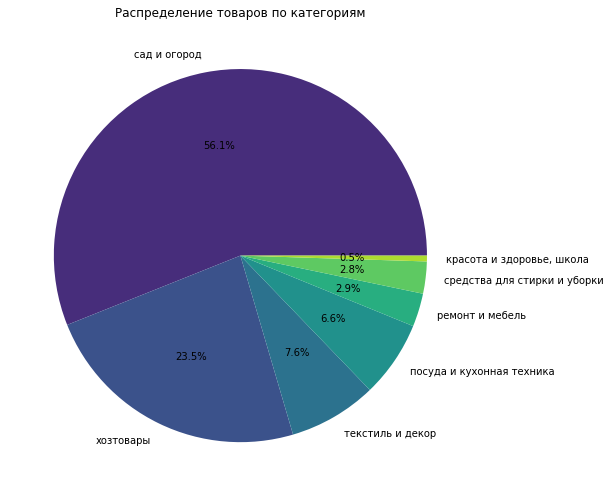

In [67]:
category_counts = data['category'].value_counts()
category_counts['красота и здоровье, школа'] = category_counts.pop('красота и здоровье') + category_counts.pop('школа')

plt.figure(figsize=(10, 7))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', colors=sns.color_palette('viridis', len(category_counts)))

plt.title('Распределение товаров по категориям')
plt.tight_layout()

plt.show()

In [68]:
data['category'].value_counts()

сад и огород                    3027
хозтовары                       1269
текстиль и декор                 413
посуда и кухонная техника        358
ремонт и мебель                  156
средства для стирки и уборки     150
красота и здоровье                16
школа                             11
Name: category, dtype: int64

- Категория Сад и огород является самой крупной, охватывая 3027 товаров. Это говорит о высоком интересе и разнообразии продукции в данной области.
- Категория Хозтовары с 1269 товарами занимает второе место. Она включает в себя широкий ассортимент необходимых предметов для дома и быта.
- Самыми малочисленными являются категории Красота и здоровье и школа (16 и 11 наименовани товара соответственно). Это относительно небольшие груцппы по сравнению с другими категориями, что может свидетельствовать о меньшем разнообразии или меньшем интересе к этим продуктам.

### Анализ продаж по категориям

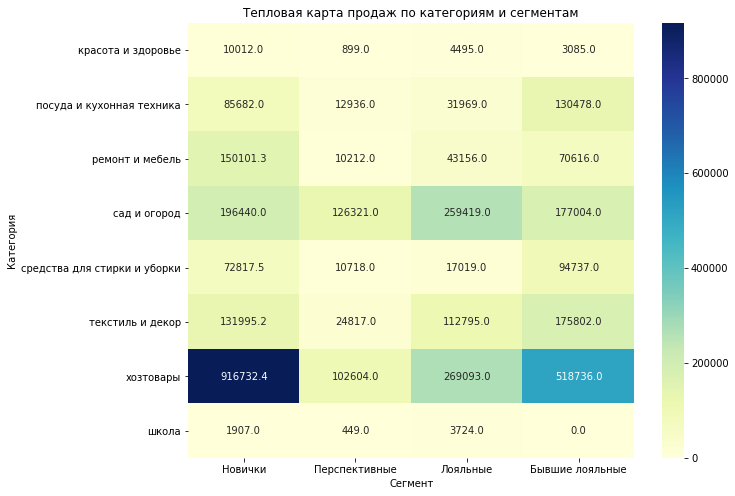

In [69]:
aggregated_data = data.groupby(['category', 'RFM_segment']).sum().reset_index()

pivot_table = aggregated_data.pivot('category', 'RFM_segment', 'total')
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title('Тепловая карта продаж по категориям и сегментам')
plt.xlabel('Сегмент')
plt.ylabel('Категория')
plt.show()

На основе анализа RFM сегментов и категорий, можно сделать следующие выводы:

1. Категории с высоким потенциалом:

- Посуда и кухонная техника и Хозтовары демонстрируют высокие средние стоимости заказов и значительное количество заказов среди всех сегментов. Это указывает на высокий спрос и возможность увеличения маржи.
- Сад и огород также показывает высокие показатели по средней стоимости заказов, особенно среди лояльных и бывших лояльных клиентов, что говорит о значительных вложениях клиентов в эту категорию.

2. Категории с проблемами удержания клиентов:

- Красота и здоровье имеет отсутствие лояльных клиентов, что может свидетельствовать о проблемах с удержанием клиентов. Это требует внимания и возможного пересмотра стратегий удержания.
- Ремонт и мебель и Текстиль и декор также демонстрируют высокие показатели среди бывших лояльных клиентов, что указывает на проблемы с удержанием клиентов после значительных покупок.

3. Категории с низким спросом:

- Школа имеет низкие показатели по количеству заказов и общей стоимости среди всех сегментов, что может указывать на низкую привлекательность категории и небольшой ассортимент. Возможны дополнительные маркетинговые усилия и расширение ассортимента для увеличения спроса.

4. Категории с высокими первоначальными затратами:

- Новички в категориях Сад и огород, Ремонт и мебель, Текстиль и декор, и Хозтовары показывают высокие средние стоимости заказов. Это указывает на успешные рекламные кампании или акции, привлекающие новых клиентов.

## Анализ сезонности покупок

### Определение сезонных периодов

In [70]:
seasonal_data = data.groupby(['year', 'season']).agg({
    'total': 'sum',
    'order_id': 'nunique',
    'customer_id': 'nunique'
}).reset_index()

seasonal_data['total'] = round(seasonal_data['total'], 2)
seasonal_data['average_order_value'] = round(seasonal_data['total'] / seasonal_data['order_id'], 2)

print("\nАнализ по сезонам:")
print(seasonal_data)


Анализ по сезонам:
   year season      total  order_id  customer_id  average_order_value
0  2018   Зима  302456.00       235          227              1287.05
1  2018  Осень  657290.00       401          355              1639.13
2  2019  Весна  798270.00       677          614              1179.13
3  2019   Зима  684849.33       661          533              1036.08
4  2019   Лето  635686.00       527          493              1206.24
5  2019  Осень  514183.75       597          559               861.28
6  2020   Зима  174036.33       269          269               646.98


Сезонные периоды определяются следующим образом:

- Зима: декабрь, январь, февраль
- Весна: март, апрель, май
- Лето: июнь, июль, август
- Осень: сентябрь, октябрь, ноябрь

### Анализ продаж по сезонам

#### Продажи по сезонам и категориям

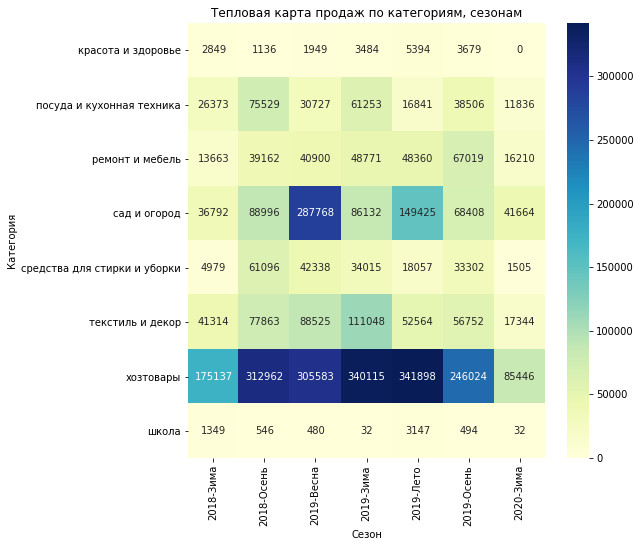

In [71]:
aggregated_data_season = data.groupby(['year', 'category', 'season']).sum().reset_index()
pivot_table = aggregated_data_season.pivot_table(index='category', columns=['year', 'season'], values='total', aggfunc='sum').fillna(0)

plt.figure(figsize=(8, 8))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title('Тепловая карта продаж по категориям, сезонам')
plt.xlabel('Сезон')
plt.ylabel('Категория')
plt.show()

1. Наибольшие продажи:

- Хозтовары имеют самые высокие продажи среди всех категорий, особенно в зимний и осенний сезоны 2019 года. В зимний сезон 2019 было продано на сумму 340'115 рублей, а в осенний сезон 2019 на сумму 305'583 рубля.

- Сад и огород также показывают высокие продажи, особенно весной 2019, с суммой продаж 287,768 рублей.

2. Наименьшие продажи:

- Школа имеет наименьшие продажи среди всех категорий, особенно зимой 2019 и 2020гг, когда было продано товаров на сумму 32.00 рублей за каждый сезон.

3. Сезонные колебания:

- Сад и огород демонстрируют высокие продажи в весенний и летний сезоны, что ожидаемо, учитывая сезонные потребности в садоводстве.

- Хозтовары показывают относительно стабильные продажи за все полные сезоны.

#### Продажи по месяцам и категориям

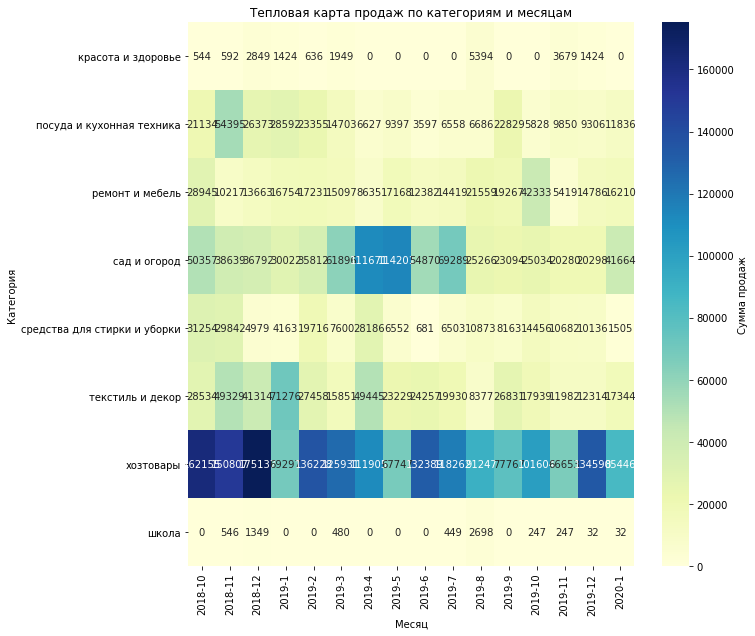

In [72]:
aggregated_data_month = data.groupby(['year', 'category', 'month']).sum().reset_index()

pivot_table = aggregated_data_month.pivot_table(index='category', columns=['year', 'month'], values='total', aggfunc='sum').fillna(0)

plt.figure(figsize=(10, 10))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap="YlGnBu", cbar_kws={'label': 'Сумма продаж'})
plt.title('Тепловая карта продаж по категориям и месяцам')
plt.xlabel('Месяц')
plt.ylabel('Категория')
plt.show()

1. Наибольшие продажи:

- Хозтовары имеют самые высокие продажи среди всех категорий, пик продаж приходится на 4 картал 2018 года. В октябре, ноябре и декабре 2018 года было продано на сумму 162'155, 150'807 и 175'137 рублей, соответственно.

- Сад и огород также показывают высокие продажи в апреле и мае 2019 года, с суммой продаж 111,671 рублей в апреле и 114,201 рублей в мае.


2. Сезонные колебания:

- Сад и огород демонстрируют высокие продажи в апреле и мае 2019 года, и низкие продажи с августа по декабрь 2019, что ожидаемо, учитывая сезонные потребности в садоводстве .

- Категория Посуда и кухонная техника показывает увеличение продаж перед новогодними праздниками в ноябре 2018 и составляет 54'395 рублей.

- Категория Текстиль и декор так же показывает увеличение продаж перед новогодними праздниками в ноябре 2018, а также в апреле 2019 года и составляет около 49'000 рублей, но пик приходится на январь 2019 года и сумма продаж составляет 71'276 рублей.

#### Продажи по месяцам, категориям и сегментам

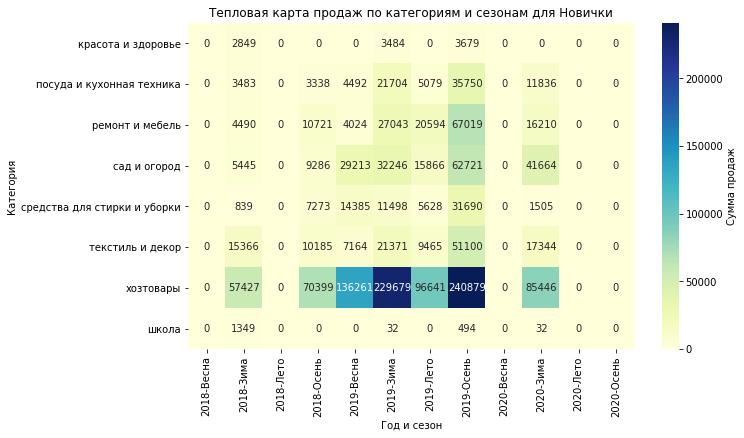

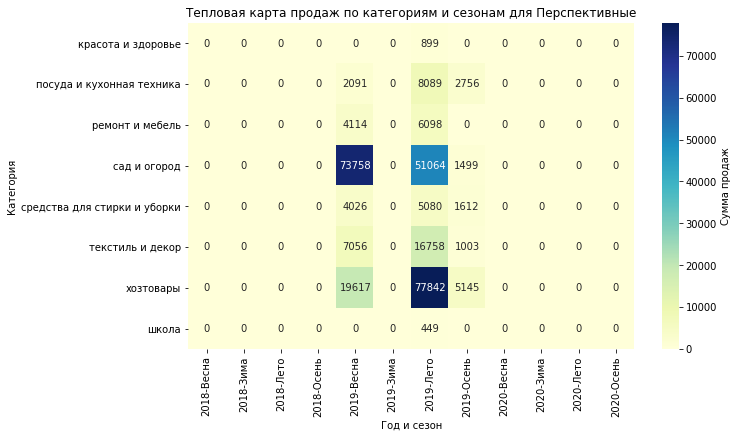

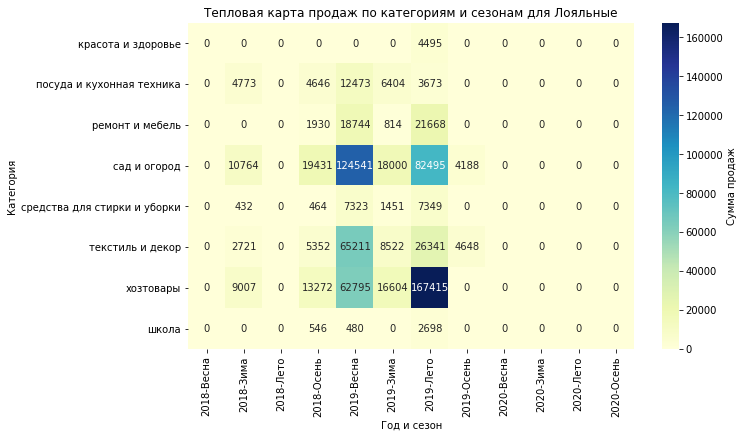

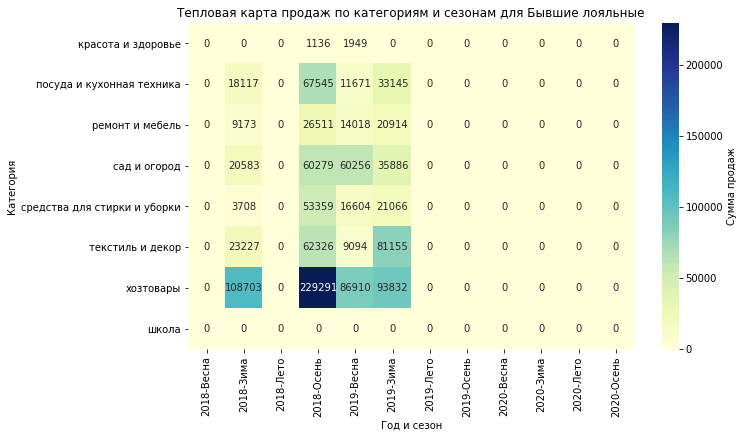

In [73]:
aggregated_data_season = data.groupby(['RFM_segment', 'year', 'category', 'season']).sum().reset_index()

for segment in aggregated_data_season['RFM_segment'].unique():
    segment_data = aggregated_data_season[aggregated_data_season['RFM_segment'] == segment]
    
    pivot_table = segment_data.pivot_table(
        index='category', 
        columns=['year', 'season'], 
        values='total', 
        aggfunc='sum'
    ).fillna(0)

    plt.figure(figsize=(10, 6))
    sns.heatmap(
        pivot_table,
        annot=True, 
        fmt=".0f", 
        cmap="YlGnBu", 
        cbar_kws={'label': 'Сумма продаж'}
    )
    plt.title(f'Тепловая карта продаж по категориям и сезонам для {segment}')
    plt.xlabel('Год и сезон')
    plt.ylabel('Категория')
    plt.show()

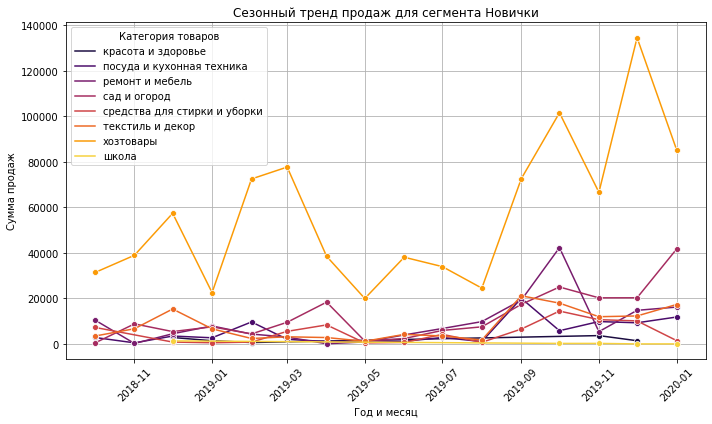

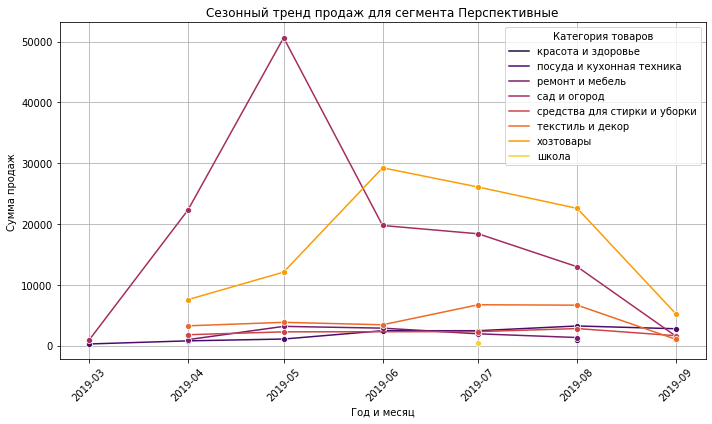

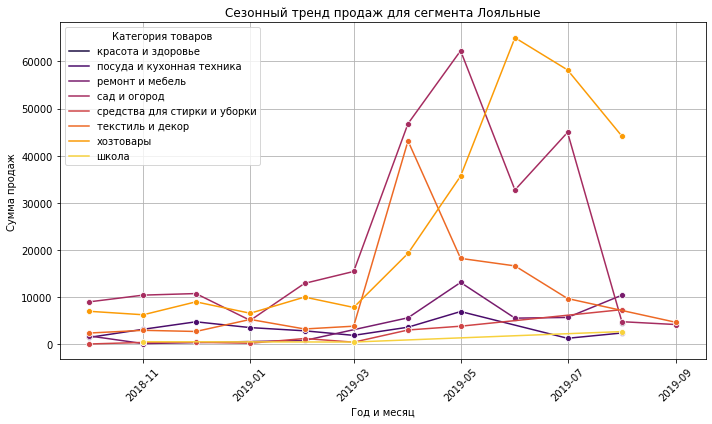

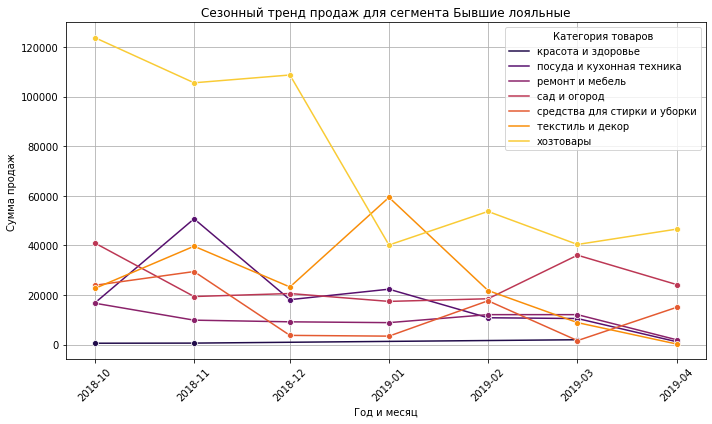

In [74]:
aggregated_data_segment = data.groupby(['RFM_segment', 'category', 'year', 'month']).sum().reset_index()

aggregated_data_segment['year_month'] = pd.to_datetime(aggregated_data_segment[['year', 'month']].assign(day=1))
aggregated_data_segment = aggregated_data_segment[aggregated_data_segment['total'] > 0]
for segment in aggregated_data_segment['RFM_segment'].unique():
    segment_data = aggregated_data_segment[aggregated_data_segment['RFM_segment'] == segment]
    
    plt.figure(figsize=(10, 6))
    sns.lineplot(
        x='year_month', 
        y='total', 
        hue='category', 
        data=segment_data,
        palette='inferno',
        marker='o'
    )
    plt.title(f'Сезонный тренд продаж для сегмента {segment}')
    plt.xlabel('Год и месяц')
    plt.ylabel('Сумма продаж')
    plt.xticks(rotation=45)
    plt.legend(title='Категория товаров')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

На основе предоставленных данных можно сделать следующие выводы о сезонности продаж по категориям товаров и сегментам покупателей:

1. Сегмент "Новички":
- Хозтовары: Наибольший объем продаж приходится на зиму и осень, особенно в 2019 году, что может указывать на сезонные потребности в хозтоварах. "Новички" чаще других сегментов покупают товары из категории Хозтовары.
- Сад и огород: Этот сегмент демонстрирует высокие продажи в зимний и осенний сезоны 2019 года, что может быть связано с подготовкой к садовому сезону весной и осенью.
- Ремонт и мебель: Продукция этой категории популярна в осенний сезон, с пиком продаж осенью 2019 года.

2. Сегмент "Перспективные":
- Сад и огород: Продукты для сада и огорода имеют значительные продажи весной и летом 2019 года, что также может быть связано с подготовкой к весеннему сезону.
- Хозтовары: Высокие продажи наблюдаются летом 2019 года, что может свидетельствовать о повышенном спросе на эту категорию в определенные периоды.

3. Сегмент "Лояльные":
- Сад и огород: Этот сегмент показывает устойчивые продажи весной и летом 2019 года, что может свидетельствовать о постоянном интересе к садоводству.
- Хозтовары: Наибольшие продажи приходятся на лето 2019 года, что может говорить о сезонных потребностях.
- Текстиль и декор: Продажи в этой категории значительны так же летом 2019 года, что может указывать на сезонные обновления интерьера.

4. Сегмент "Бывшие лояльные":
- Хозтовары: Наибольшие продажи приходятся на зиму и осень, особенно в 2018 году, что может свидетельствовать о сезонных нуждах бывших лояльных клиентов.
- Посуда и кухонная техника: Высокие продажи наблюдаются осенью 2018, что может указывать на подготовку к новогодним праздникам.
- Текстиль и декор: Продажи в этой категории значительны так же осенью 2018 года, что также может указывать на подготовку к новогодним праздникам.

## Разработка рекомендаций по рекламным рассылкам

### Определение стратегий маркетинга для каждого сегмента

In [75]:
aggregated_data = data.groupby(['RFM_segment', 'category', 'season', 'year']).agg(
    total_sales=('total', 'sum'), 
    total_units=('quantity', 'sum'), 
    purchase_count=('order_id', 'count'),
    purchase_mean=('frequency', 'mean')
).reset_index()

aggregated_data['average_purchase_amount'] = aggregated_data['total_sales'] / aggregated_data['purchase_count']

aggregated_data['average_price_per_unit'] = aggregated_data['total_sales'] / aggregated_data['total_units']

segment_summary = aggregated_data.groupby('RFM_segment').agg(
    average_purchase_amount=('average_purchase_amount', 'mean'),
    average_price_per_unit=('average_price_per_unit', 'mean'),
    purchase_mean=('purchase_mean', 'mean')
    
).reset_index()
segment_summary

,RFM_segment,average_purchase_amount,average_price_per_unit,purchase_mean
0,Новички,1016.391133,913.243505,1.992940
1,Перспективные,569.006484,357.095276,1.169644
2,Лояльные,1366.197408,669.724016,1.246735
3,Бывшие лояльные,1736.703907,462.385894,2.101348


1. Сегмент: **Новички**
- Средняя сумма покупки: 1'016,39 руб.
- Частота покупок: 1,99 покупки.
- Средний прайс за единицу товара: 913,24 руб.
- Предпочтительные категории товара: Хозтовары, Сад и огород, Ремонт и мебель.
- Рекомендуемые сезоны: Осень — пики покупок в категориях Сад и огород, Ремонт и мебель - Осень, в категории Хозтовары - Осень и Зима.

2. Сегмент: **Перспективные**
- Средняя сумма покупки: 569,01 руб.
- Частота покупок: 1,17 покупки.
- Средний прайс за единицу товара: 357,10 руб.
- Предпочтительные категории товара: Хозтовары, Сад и огород.
- Рекомендуемые сезоны: Весна и Лето — особенно активны по категориям Сад и огород и Хозтовары - Лето.

3. Сегмент: **Лояльные**
- Средняя сумма покупки: 1,366,19 руб.
- Частота покупок: 1,25 покупки.
- Средний прайс за единицу товара: 669,72 руб.
- Предпочтительные категории товара: Сад и огород, Хозтовары, Текстиль и декор.
- Рекомендуемые сезоны: Весна и Лето — особенно активны по категориям Сад и огород и Хозтовары, Лето - Текстиль и декор.

4. Сегмент: **Бывшие лояльные**
- Средняя сумма покупки: 1,736,70 руб.
- Частота покупок: 2,10 покупки.
- Средний прайс за единицу товара: 462,39 руб.
- Предпочтительные категории товара: Хозтовары, Сад и огород, Текстиль и декор.
- Рекомендуемые сезоны: Осень- активные покупки в категориях Хозтовары, Посуда и кухонная техника, Текстиль и декор, Зима — Текстиль и декор.

### Разработка персонализированных предложений на основе сегментации

1. Сегмент: **Новички**
- Welcome-кампания: Отправить приветственное письмо с благодарностью за покупку, информацией о компании и специальных предложениях для новых клиентов.
- Скидка на следующий заказ: Предложить скидку или купон на следующую покупку, чтобы стимулировать повторные покупки.
- Обучение и информация: Предоставить информацию о продуктах и их преимуществах, чтобы помочь новым клиентам сделать осознанный выбор в будущем.

2. Сегмент: **Перспективные**
- Персонализированные предложения: Предложить персонализированные рекомендации и специальные предложения на основе их предыдущих покупок.
- Программы лояльности: Вовлечь клиентов в программу лояльности с бонусами за частоту и объем покупок.
- Обратная связь: Собирать обратную связь, чтобы улучшить обслуживание и удовлетворенность клиентов.

3. Сегмент: **Лояльные**
- Эксклюзивные предложения: Предлагать эксклюзивные скидки и предложения только для лояльных клиентов.
- Программы вознаграждения: Увеличить вовлеченность через программы вознаграждения и VIP-статусы.
- Предоставление ценности: Предлагать дополнительные услуги, такие как бесплатная доставка или приоритетное обслуживание.

4. Сегмент: **Бывшие лояльные**
- Реактивация клиентов: Использовать email-рассылки и push-уведомления с напоминаниями о сезонных предложениях.
- Понимание причин: Проводить опросы, чтобы понять причины их ухода и устранить проблемы.
- Сезонные и целевые кампании: Запускать сезонные и целевые рекламные кампании для возвращения интереса.